
# Passenger Journeys Analysis (THA24 Dataset) – NTA Showcase Project

This notebook demonstrates analysis of the **THA24 Passenger Journeys** dataset, published by the National Transport Authority (NTA) via [data.gov.ie](https://data.gov.ie).
It is designed as a portfolio piece to accompany my application for the **Data and Reporting Analyst** role.

## Objectives
1. **Understand the data** – Explore structure, explain each column, clean where needed.
2. **Aggregate and analyse** – Examine passenger journeys over time by mode of transport.
3. **Visualise insights** – Create charts showing trends, peaks, and mode share.
4. **Provide regulatory context** – Frame insights that could support evidence-based decision making in public transport regulation.

## Column Explanations
- **STATISTIC**: Internal table code for the dataset.
- **Statistic Label**: Description of the statistic (e.g., Passenger Journeys).
- **TLIST(A1)**: Time list classification code.
- **Year**: Calendar year of data.
- **C03935V04687**: Internal classification code (e.g., region or sub-category).
- **Mode of Transport**: Public transport type (e.g., Dublin Metro Bus, Rail, Luas).
- **C01198V01436**: Internal code (likely week number ID).
- **Weeks of the year**: Week label (e.g., Week 01).
- **UNIT**: Measurement unit (Number).
- **VALUE**: Passenger journey count.

---

The analysis will focus on: `Year`, `Mode of Transport`, `Weeks of the year`, and `VALUE` (journey counts).



# Public Transport Passenger Journeys Analysis (THA24 Dataset)

This notebook analyses the **THA24 – Passenger Journeys** dataset from the National Transport Authority's open data portal.

We will:
1. Load and inspect the dataset.
2. Clean and preprocess the data.
3. Aggregate journeys by month and year.
4. Create visualisations for trends by transport mode.


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib.ticker import StrMethodFormatter
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter

# Load dataset (replace path with your local file path)
file_path = "../data/raw/THA24.csv"
df = pd.read_csv(file_path)

# View structure
df.head()


STATISTIC     Statistic Label  TLIST(A1)  Year  C03935V04687  \
0  THA24C01  Passenger Journeys       2019  2019            10   
1  THA24C01  Passenger Journeys       2019  2019            10   
2  THA24C01  Passenger Journeys       2019  2019            10   
3  THA24C01  Passenger Journeys       2019  2019            10   
4  THA24C01  Passenger Journeys       2019  2019            10   

  Mode of Transport  C01198V01436 Weeks of the year    UNIT      VALUE  
0  Dublin Metro Bus             1           Week 01  Number  1987891.0  
1  Dublin Metro Bus             2           Week 02  Number  2709579.0  
2  Dublin Metro Bus             3           Week 03  Number  2784678.0  
3  Dublin Metro Bus             4           Week 04  Number  2858346.0  
4  Dublin Metro Bus             5           Week 05  Number  2924821.0

In [17]:

# Drop unused coded columns
df_clean = df.drop(columns=["STATISTIC", "TLIST(A1)", "C03935V04687", "C01198V01436", "UNIT"])

# Rename columns for easier use
df_clean = df_clean.rename(columns={
    "Statistic Label": "Statistic",
    "Mode of Transport": "Mode",
    "Weeks of the year": "Week",
    "VALUE": "Journeys"
})

# Handle missing values (if any)
df_clean = df_clean.dropna(subset=["Journeys"])

# Preview
df_clean.head()


Statistic  Year              Mode     Week   Journeys
0  Passenger Journeys  2019  Dublin Metro Bus  Week 01  1987891.0
1  Passenger Journeys  2019  Dublin Metro Bus  Week 02  2709579.0
2  Passenger Journeys  2019  Dublin Metro Bus  Week 03  2784678.0
3  Passenger Journeys  2019  Dublin Metro Bus  Week 04  2858346.0
4  Passenger Journeys  2019  Dublin Metro Bus  Week 05  2924821.0

In [18]:
# Aggregate yearly journeys by mode
yearly_data = df_clean.groupby(["Year", "Mode"])["Journeys"].sum().reset_index()

# Display
yearly_data.sort_values(["Year", "Mode"]).head(10)


Year                                  Mode     Journeys
0  2019  All public transport, excluding LUAS  188557151.0
1  2019           Bus, excluding Dublin Metro   36901670.0
2  2019                      Dublin Metro Bus  151655481.0
3  2020  All public transport, excluding LUAS  116305960.0
4  2020           Bus, excluding Dublin Metro   19506540.0
5  2020                      Dublin Metro Bus   78017550.0
6  2020                                  Rail   18781870.0
7  2021  All public transport, excluding LUAS  116484695.0
8  2021           Bus, excluding Dublin Metro   21041474.0
9  2021                      Dublin Metro Bus   78370260.0

In [19]:
# Brand colors
mode_colors = {
    "Dublin Metro Bus":  "#ffe600",
    "Bus, excluding Dublin Metro": "#c2002f",
    "Rail":        "#2e8539",
    # For the aggregate line, not used in mode-share:
    "All public transport, excluding LUAS": "#5c068c",
}

# Helper to fetch a color safely
def color_for(mode: str) -> str:
    # try exact, then case-insensitive fallback
    for k in mode_colors:
        if mode == k:
            return mode_colors[k]
    for k in mode_colors:
        if mode.lower() == k.lower():
            return mode_colors[k]
    return None  # matplotlib will auto-assign if None


In [20]:
fig, ax = plt.subplots(figsize=(12, 6))

for mode, g in ydf.sort_values("Year").groupby("Mode"):
    ax.plot(g["Year"], g["Journeys"],
            label=mode,
            color=color_for(mode))  # <- use brand color

ax.set_title("Yearly Passenger Journeys by Mode of Transport")
ax.set_xlabel("Year")
ax.set_ylabel("Total journeys (millions per year)")
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{x/1e6:.1f}"))
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.grid(True, axis="y", alpha=0.25)
ax.margins(y=0.05)
ax.legend(loc="center left", bbox_to_anchor=(1.02, 0.5), frameon=False)
fig.tight_layout(); plt.show()


In [21]:

# Weekly trends (can later be turned into monthly if needed)
weekly_data = df_clean.groupby(["Year", "Week", "Mode"])["Journeys"].sum().reset_index()

# Display first few rows
weekly_data.head()


Year     Week                                  Mode   Journeys
0  2019  Week 01  All public transport, excluding LUAS  2485489.0
1  2019  Week 01           Bus, excluding Dublin Metro   497598.0
2  2019  Week 01                      Dublin Metro Bus  1987891.0
3  2019  Week 02  All public transport, excluding LUAS  3343343.0
4  2019  Week 02           Bus, excluding Dublin Metro   633764.0

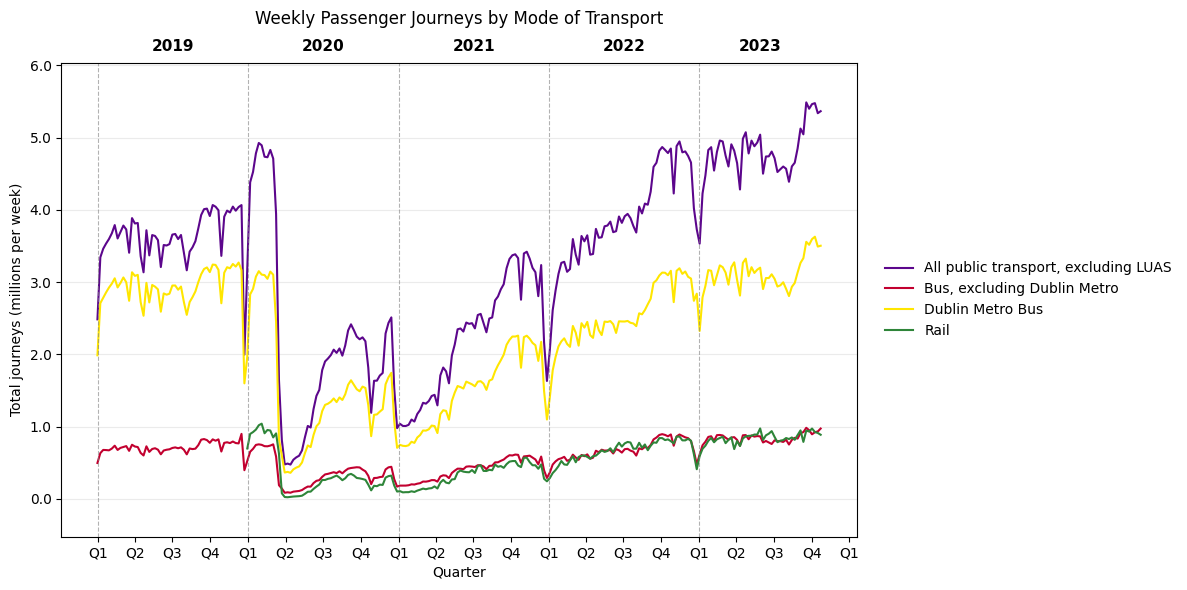

In [24]:
# --- prep weekly_df with a real date column ---
weekly_df = weekly_data.rename(columns={
    "Mode of Transport": "Mode",
    "total_journeys": "Journeys"
}).copy()

weekly_df["Year"] = weekly_df["Year"].astype(int)
weekly_df["Week"] = weekly_df["Week"].astype(str).str.extract(r"(\d+)").astype(int)
weekly_df["Journeys"] = weekly_df["Journeys"].astype(float)

# Monday of each ISO week
weekly_df["date"] = pd.to_datetime(
    weekly_df["Year"].astype(str) + "-W" + weekly_df["Week"].astype(str) + "-1",
    format="%G-W%V-%u"
)

# --- plot using your color_for(mode) helper ---
fig, ax = plt.subplots(figsize=(12, 6))
for mode, d in weekly_df.sort_values("date").groupby("Mode"):
    ax.plot(d["date"], d["Journeys"], label=mode, color=color_for(mode))

ax.set_title("Weekly Passenger Journeys by Mode of Transport", pad=28)
ax.set_xlabel("Quarter")
ax.set_ylabel("Total journeys (millions per week)")
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{x/1e6:.1f}"))
ax.grid(True, axis="y", alpha=0.25)
ax.margins(y=0.10)

# year separators + labels (same as before)
years = sorted(weekly_df["Year"].unique())
for y in years:
    ax.axvline(pd.Timestamp(y, 1, 1), ls="--", lw=0.8, color="grey", alpha=0.6)
ymax = ax.get_ylim()[1]
for i, y in enumerate(years):
    start = pd.Timestamp(y, 1, 1)
    end = pd.Timestamp(years[i+1], 1, 1) if i < len(years)-1 else weekly_df["date"].max()
    ax.text(start + (end - start)/2, ymax*1.02, str(y), ha="center", va="bottom", fontsize=11, fontweight="bold")

# quarterly ticks Q1/Q2/Q3/Q4
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=[1,4,7,10]))
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f"Q{((mdates.num2date(x).month - 1)//3) + 1}"))

ax.legend(loc="center left", bbox_to_anchor=(1.02, 0.5), frameon=False)
fig.tight_layout(); plt.show()


In [28]:
# --- compute mode shares ---
year_totals = base.groupby("Year")["Journeys"].sum().rename("Year_Total")
ms = base.merge(year_totals, on="Year")
ms["Mode_Share"] = ms["Journeys"] / ms["Year_Total"]

# --- consistent order by avg share ---
mode_order = (
    ms.groupby("Mode")["Mode_Share"].mean()
      .sort_values(ascending=False)
      .index.tolist()
)

# --- pivot ---
wide = (ms.pivot(index="Year", columns="Mode", values="Mode_Share")
          .reindex(columns=mode_order)
          .sort_index())

# --- plot ---
fig, ax = plt.subplots(figsize=(12, 6))
bottom = None

for mode in wide.columns:
    vals = wide[mode].fillna(0)
    bars = ax.bar(wide.index, vals, bottom=bottom, label=mode, color=color_for(mode))
    
    # inline % labels for segments >3%
    for bar, val in zip(bars, vals):
        if val > 0.03:
            ax.text(bar.get_x() + bar.get_width()/2,
                    bar.get_y() + val/2,
                    f"{val*100:.0f}%",
                    ha="center", va="center",
                    fontsize=8, color="black", fontweight="bold")
    
    bottom = vals if bottom is None else bottom + vals

ax.set_title("Mode Share of Passenger Journeys by Year")
ax.set_xlabel("Year")
ax.set_ylabel("Mode share (%)")
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{x*100:.0f}%"))
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.grid(True, axis="y", alpha=0.25)
ax.margins(y=0.05)

# legend outside
ax.legend(loc="center left", bbox_to_anchor=(1.02, 0.5), frameon=False)
fig.tight_layout()
plt.show()


# Conclusion & Next Steps

From this analysis, we can identify:
- **Growth/decline patterns** in different modes over the years.
- **Seasonal peaks and troughs** in passenger demand.
- **Mode share changes** year-on-year.

**Potential uses for the NTA**:
- Aligning service capacity with demand peaks.
- Identifying modes needing targeted investment or support.
- Providing clear visual evidence for policy and service planning.

**Next Steps** (if extending this project):
- Combine with service punctuality or cancellations data for reliability insights.
- Integrate geographic data to map demand hotspots.
- Automate updates using a scheduled ETL pipeline.

---
*This notebook demonstrates my ability to acquire, clean, analyse, and present transport data in a way that supports evidence-based decision-making.*
